<h1><center>Music Genre Application</center></h1>

## [1] Objective
Develop a machine learning-based music genre classification application that can accurately analyze and categorize audio tracks into predefined music genres.

## [2] Data Understanding
- track_id character Song unique ID
- track_name character Song Name
- track_artist character Song Artist
- track_popularity double Song Popularity (0-100) where higher is better
- track_album_id character Album unique ID
- track_album_name character Song album name
- track_album_release_date character Date when album released
- playlist_name character Name of playlist
- playlist_id character Playlist ID
- playlist_genre character Playlist genre
- playlist_subgenre character Playlist subgenre
- danceability double Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- energy double Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- key double The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- loudness double The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
- mode double Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- speechiness double Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- acousticness double A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- instrumentalness double Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- liveness double Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
valence double A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- tempo double The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- duration_ms double Duration of song in milliseconds

## [3] Importing Libraries

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## [4] Getting the Data

In [2]:
df = pd.read_csv('../../data/spotify_songs.csv')

In [3]:
df.head().T

,0,1,2,3,4
track_id,6f807x0ima9a1j3VPbc7VN,0r7CVbZTWZgbTCYdfa2P31,1z1Hg7Vb0AhHDiEmnDE79l,75FpbthrwQmzHlBJLuGdC7,1e8PAfcKUYoKkxPhrHqw4x
track_name,I Don't Care (with Justin Bieber) - Loud Luxur...,Memories - Dillon Francis Remix,All the Time - Don Diablo Remix,Call You Mine - Keanu Silva Remix,Someone You Loved - Future Humans Remix
track_artist,Ed Sheeran,Maroon 5,Zara Larsson,The Chainsmokers,Lewis Capaldi
track_popularity,66,67,70,60,69
track_album_id,2oCs0DGTsRO98Gh5ZSl2Cx,63rPSO264uRjW1X5E6cWv6,1HoSmj2eLcsrR0vE9gThr4,1nqYsOef1yKKuGOVchbsk6,7m7vv9wlQ4i0LFuJiE2zsQ
track_album_name,I Don't Care (with Justin Bieber) [Loud Luxury...,Memories (Dillon Francis Remix),All the Time (Don Diablo Remix),Call You Mine - The Remixes,Someone You Loved (Future Humans Remix)
track_album_release_date,2019-06-14,2019-12-13,2019-07-05,2019-07-19,2019-03-05
playlist_name,Pop Remix,Pop Remix,Pop Remix,Pop Remix,Pop Remix
playlist_id,37i9dQZF1DXcZDD7cfEKhW,37i9dQZF1DXcZDD7cfEKhW,37i9dQZF1DXcZDD7cfEKhW,37i9dQZF1DXcZDD7cfEKhW,37i9dQZF1DXcZDD7cfEKhW
playlist_genre,pop,pop,pop,pop,pop


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

```We need to convert track_album_release_date into datetime```

In [5]:
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

```track_name, track_artist, track_album_name contain missing values```

In [6]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


**Observations**
- track_popularity Ranges from 0-100. Average track popularity is 42.48.Their is a slight difference between the mean and median.  
- 25% of the track has popularity value above 62.
- avg. daceability value of songs in our dataset has value around 0.65
- avg. energy level of a song is 0.70. 25% of songs have an energy level above 0.84.
- 50% Songs have a duration 0f 216000ms which is 216 seconds or 3 minutes 36sec or 3.6 minutes. 
- We have a song which is 517810 ms long which is 8.63 minutes long.Surely we have an outleir in this feature. (We will see which song is this)

In [7]:
# checking uniqueness
df.nunique()

track_id                    28356
track_name                  23449
track_artist                10692
track_popularity              101
track_album_id              22545
track_album_name            19743
track_album_release_date     4530
playlist_name                 449
playlist_id                   471
playlist_genre                  6
playlist_subgenre              24
danceability                  822
energy                        952
key                            12
loudness                    10222
mode                            2
speechiness                  1270
acousticness                 3731
instrumentalness             4729
liveness                     1624
valence                      1362
tempo                       17684
duration_ms                 19785
dtype: int64

In [8]:
# checking for duplicate values
df.duplicated().sum()

0

```There are no duplicate values in our dataset```

## [5] Data Preprocessing

```
Lets take care of:
    -   Missing values
    -   track_album_release_date to datetime
```

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

```There are no duplicate values```

In [13]:
df['track_album_release_date'].dtype

dtype('O')

In [14]:
df['track_album_release_date'].value_counts()

track_album_release_date
2020-01-10    270
2019-11-22    244
2019-12-06    235
2019-12-13    220
2013-01-01    219
             ... 
1973-08-28      1
2000-03-23      1
1967-04         1
1968-07-03      1
2014-04-18      1
Name: count, Length: 4529, dtype: int64

In [16]:
# Lets extract year and month from track_album_release_date
df['album_release_year'] = pd.DatetimeIndex(df['track_album_release_date']).year
df['album_release_month'] = pd.DatetimeIndex(df['track_album_release_date']).month

In [17]:
df.head().T

,0,1,2,3,4
track_id,6f807x0ima9a1j3VPbc7VN,0r7CVbZTWZgbTCYdfa2P31,1z1Hg7Vb0AhHDiEmnDE79l,75FpbthrwQmzHlBJLuGdC7,1e8PAfcKUYoKkxPhrHqw4x
track_name,I Don't Care (with Justin Bieber) - Loud Luxur...,Memories - Dillon Francis Remix,All the Time - Don Diablo Remix,Call You Mine - Keanu Silva Remix,Someone You Loved - Future Humans Remix
track_artist,Ed Sheeran,Maroon 5,Zara Larsson,The Chainsmokers,Lewis Capaldi
track_popularity,66,67,70,60,69
track_album_id,2oCs0DGTsRO98Gh5ZSl2Cx,63rPSO264uRjW1X5E6cWv6,1HoSmj2eLcsrR0vE9gThr4,1nqYsOef1yKKuGOVchbsk6,7m7vv9wlQ4i0LFuJiE2zsQ
track_album_name,I Don't Care (with Justin Bieber) [Loud Luxury...,Memories (Dillon Francis Remix),All the Time (Don Diablo Remix),Call You Mine - The Remixes,Someone You Loved (Future Humans Remix)
track_album_release_date,2019-06-14,2019-12-13,2019-07-05,2019-07-19,2019-03-05
playlist_name,Pop Remix,Pop Remix,Pop Remix,Pop Remix,Pop Remix
playlist_id,37i9dQZF1DXcZDD7cfEKhW,37i9dQZF1DXcZDD7cfEKhW,37i9dQZF1DXcZDD7cfEKhW,37i9dQZF1DXcZDD7cfEKhW,37i9dQZF1DXcZDD7cfEKhW
playlist_genre,pop,pop,pop,pop,pop


## [6] Exploratory Data Analysis

In [18]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'album_release_year', 'album_release_month'],
      dtype='object')

#### **Uni-variate Analysis**

<p style="color: green">How many unique songs are there in our dataset?</p>

In [21]:
# checking uniqueness using track_id
df['track_id'].unique().shape

(28352,)

```There are 28352 unique songs```

<p style="color: green">Which artist has the most track in our dataset</p>

In [25]:
# Top 10 artists with many songs
df['track_artist'].value_counts().head(10)

track_artist
Martin Garrix                161
Queen                        136
The Chainsmokers             123
David Guetta                 110
Don Omar                     102
Drake                        100
Dimitri Vegas & Like Mike     93
Calvin Harris                 91
Hardwell                      84
Kygo                          83
Name: count, dtype: int64

```Martin Garrix lead with 161 tracks followed by Queen, The Chainsmokers ,,,```

<Axes: xlabel='track_popularity', ylabel='Count'>

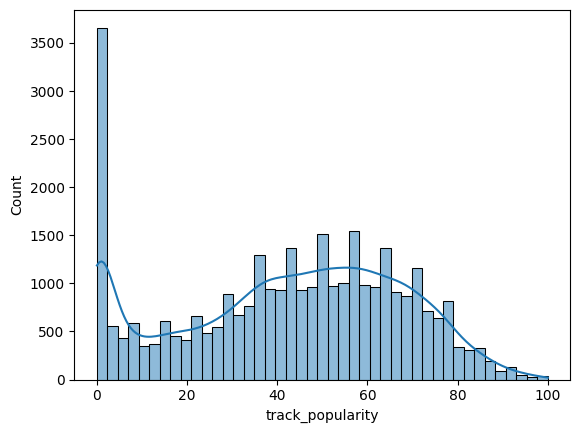

In [30]:
sns.histplot(data=df, x='track_popularity',kde=True)

<p style='color:green'>What is the distribution of genre and what genre has the maximum songs?</p>

In [31]:
df['playlist_genre'].value_counts()

playlist_genre
edm      6043
rap      5743
pop      5507
r&b      5431
latin    5153
rock     4951
Name: count, dtype: int64

<Axes: xlabel='playlist_genre', ylabel='count'>

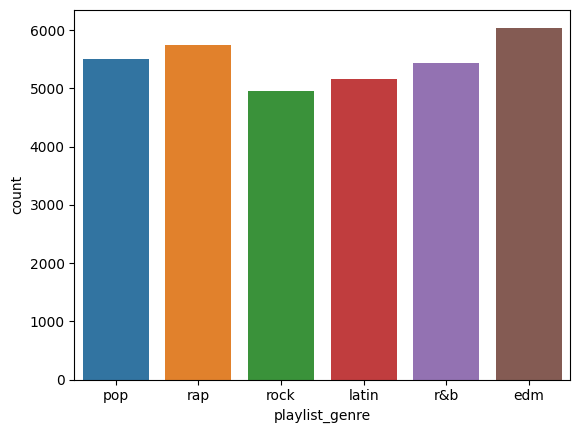

In [32]:
# visualize it using countplot
sns.countplot(data=df, x='playlist_genre')

```edm is the most popular genre followed by rap, pop, r&b, latin and rock ```

<p style="color:green">Which sub-genre is most popular in our dataset</p>

In [36]:
df['playlist_subgenre'].value_counts()

playlist_subgenre
progressive electro house    1809
southern hip hop             1674
indie poptimism              1672
latin hip hop                1655
neo soul                     1637
pop edm                      1517
electro house                1511
hard rock                    1485
gangster rap                 1456
electropop                   1408
urban contemporary           1405
hip hop                      1322
dance pop                    1298
classic rock                 1296
trap                         1291
tropical                     1288
latin pop                    1262
hip pop                      1256
big room                     1206
new jack swing               1133
post-teen pop                1129
permanent wave               1105
album rock                   1065
reggaeton                     948
Name: count, dtype: int64

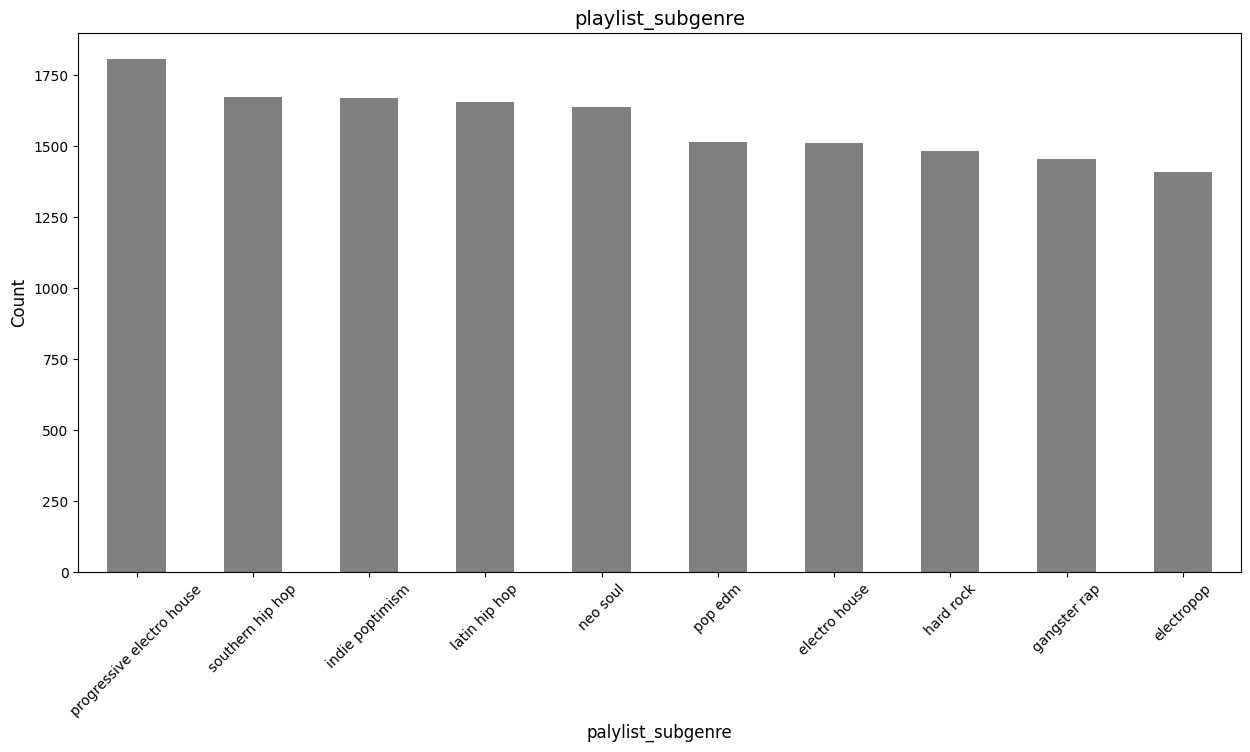

In [42]:
# visualization
paper = plt.figure(figsize=(15,7))
df['playlist_subgenre'].value_counts()[:10].plot.bar(color='grey')
plt.title('playlist_subgenre',size=14)
plt.xlabel('palylist_subgenre',size=12)
plt.ylabel('Count',size=12)
plt.xticks(rotation=45)
plt.show()


```progressive electro house is the most popuar sub-genre ```

<p style='color:green'>What is the distribution of the following features: <strong>danceability,energy,loudness,speechiness,acousticness,instrumentalness, liveness,valence and tempo</strong></p>

In [45]:
def plot(col):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'wspace': 0.4, 'hspace': 0.4})
    sns.boxplot(data=df, x=col, ax=axes[0])
    sns.distplot(a=df[col], ax=axes[1], color='#ff4125')
    plt.show()

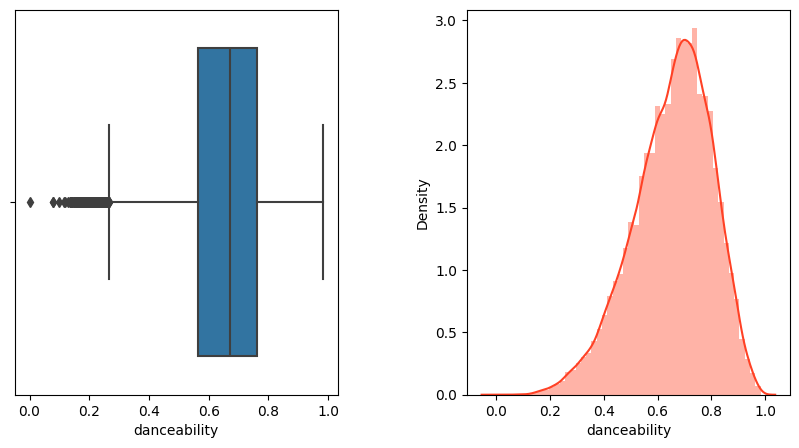

In [46]:
plot('danceability')

```danceability has an outlier```

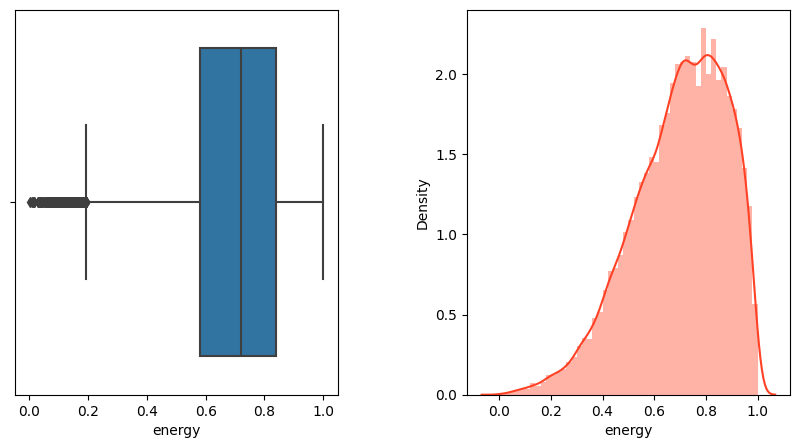

In [47]:
plot('energy')